<a href="https://colab.research.google.com/github/suyashApatil/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Copy of Hotel Bookings.csv'

In [4]:
hotelbooking_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Copy of Hotel Bookings.csv')

In [5]:
hotelbooking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotelbooking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have total 32 columns and some columns like Children,Country,Company and Agent have null values.

In [7]:
hotelbooking_df.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [8]:
# Creating a copy of dataframe
hb_df = hotelbooking_df.copy()

**Cleaning** **Data**

In [9]:
# Show no. of duplicate rows

hb_df[hb_df.duplicated()].shape

(31994, 32)

In [10]:
# Dropping duplicate rows

hb_df.drop_duplicates(inplace = True)

In [11]:
hb_df.shape

(87396, 32)

In [12]:
#Columns having missing values

hb_df.isnull().sum().sort_values(ascending = False)[0:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [13]:
hb_df[['company','agent']] = hb_df[['company','agent']].fillna(0)

In [14]:
hb_df['children']= hb_df['children'].fillna(0)

In [15]:
hb_df['country'].fillna('others', inplace = True)

In [16]:
hb_df.isnull().sum().sort_values(ascending = False)[0:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows

In [17]:
hb_df[hb_df['adults']+hb_df['babies']+hb_df['children'] == 0].shape

(166, 32)

In [18]:
hb_df.drop(hb_df[hb_df['adults']+hb_df['babies']+hb_df['children'] == 0].index, inplace = True)

In [19]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.

hb_df[['children', 'company', 'agent']] = hb_df[['children', 'company', 'agent']].astype('int64')

In [20]:
# Adding total staying days in hotels

hb_df['total_stay'] = hb_df['stays_in_weekend_nights']+hb_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies

hb_df['total_people'] = hb_df['adults']+hb_df['children']+hb_df['babies']

# **EDA**

correlation between the numerical data

In [21]:
hb_df_num = hb_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

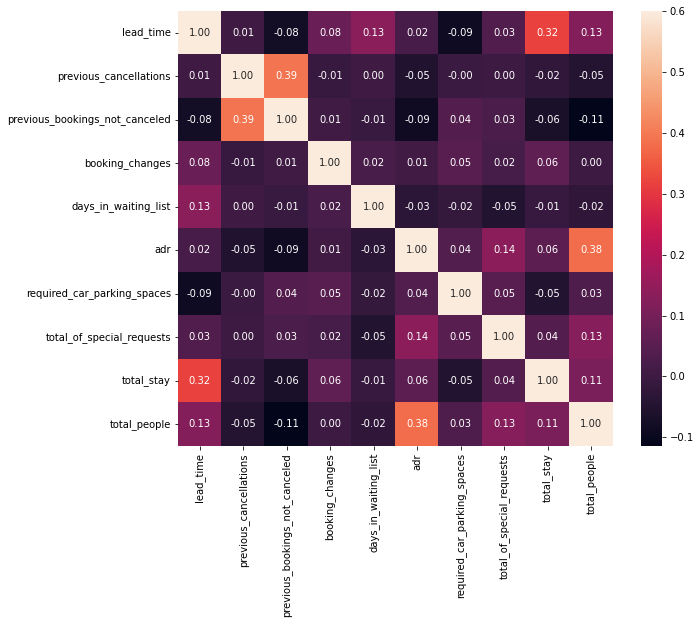

In [22]:
#correlation matrix
cormat = hb_df_num.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cormat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.6, square=True);

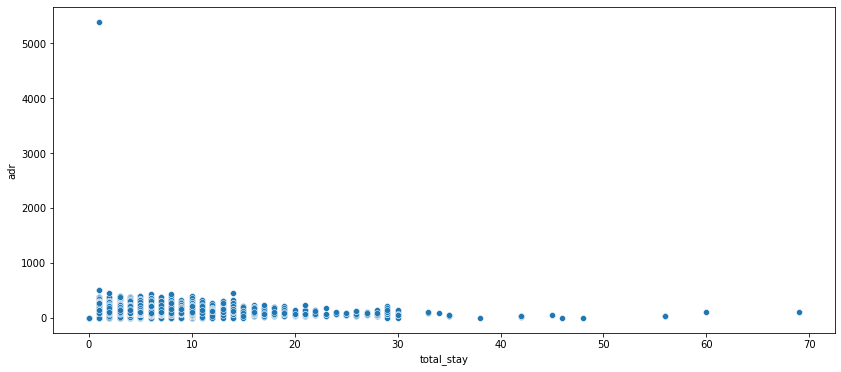

In [23]:
plt.figure(figsize = (14,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hb_df)
plt.show()

In [24]:
hb_df.drop(hb_df[hb_df['adr'] > 5000].index, inplace = True)

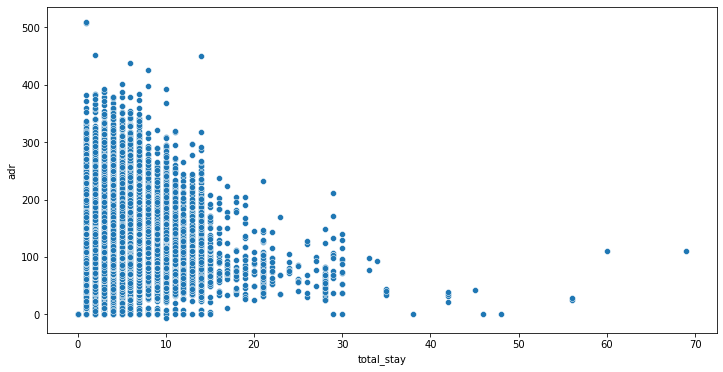

In [25]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hb_df)
plt.show()

**Univariate** **Analysis**

Q1) Which room type is in most demand and which room type generates highest adr?

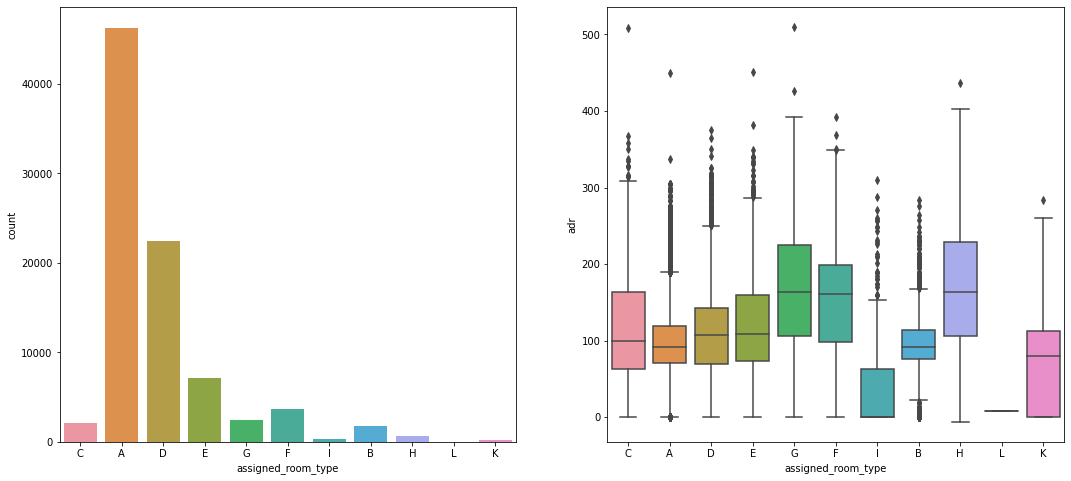

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hb_df.groupby('assigned_room_type')
hb_df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hb_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hb_df['assigned_room_type'], y = hb_df['adr'])
plt.show()

Q1)From where the most guest are coming?

In [58]:
country_wise_guests = hb_df[hb_df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


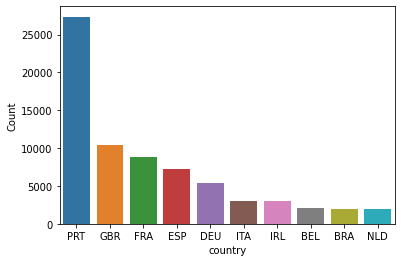

In [60]:
grouped_by_country = hb_df.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Q2) Which meal type is most preffered meal of customers?

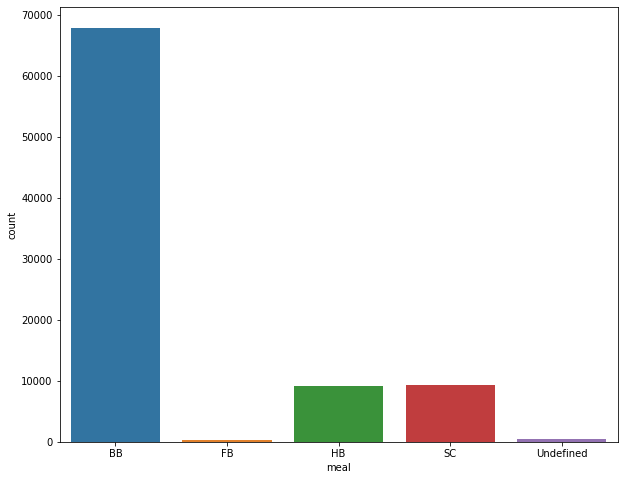

In [27]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hb_df['meal'])
plt.show()

Q3) What is percentage of bookings in each hotel?

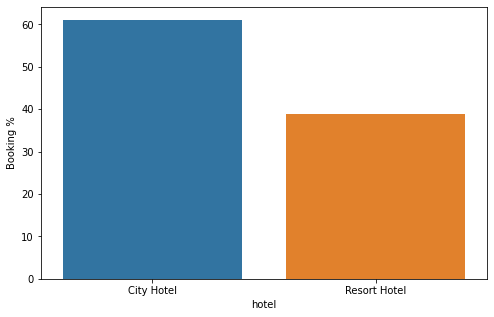

In [28]:
grouped_by_hotel = hb_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hb_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Q4) which hotel seems to make more revenue?

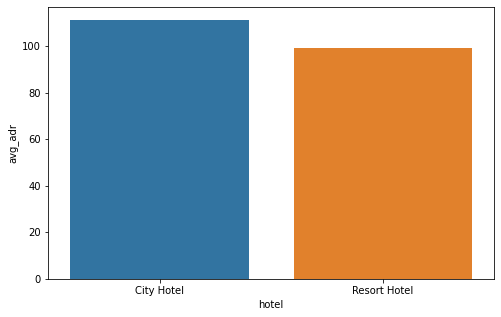

In [29]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Q5)Which hotel has higher lead time?

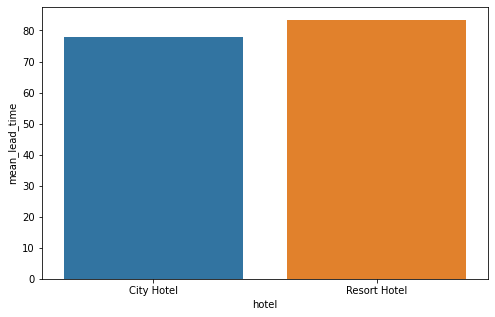

In [30]:
d2 = grouped_by_hotel['lead_time'].mean().reset_index().rename(columns = {'lead_time':'mean_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['mean_lead_time'] )
plt.show()

Q6) What is preferred stay length in each hotel?

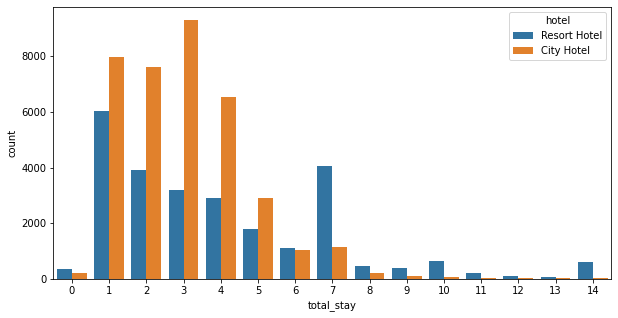

In [31]:
not_canceled = hb_df[hb_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Q7) Which hotel has longer waiting time?

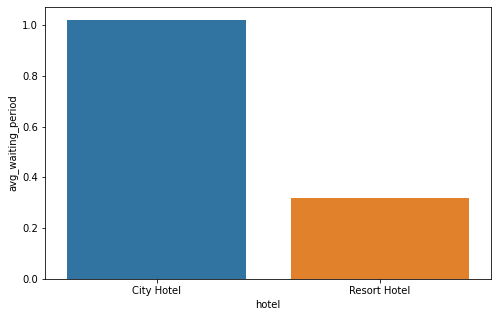

In [32]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

Q8) Which hotel has higher bookings cancellation rate?

In [33]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hb_df[hb_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hb_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


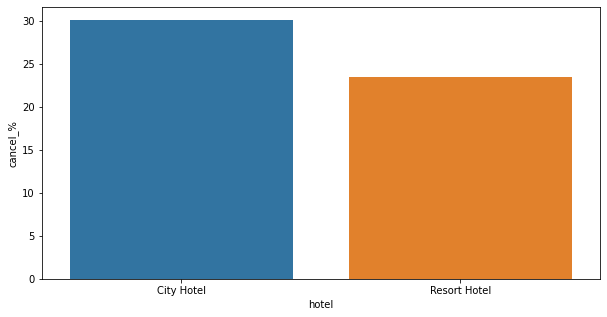

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Q9) Which hotel has high chance that its customer will return for another stay?

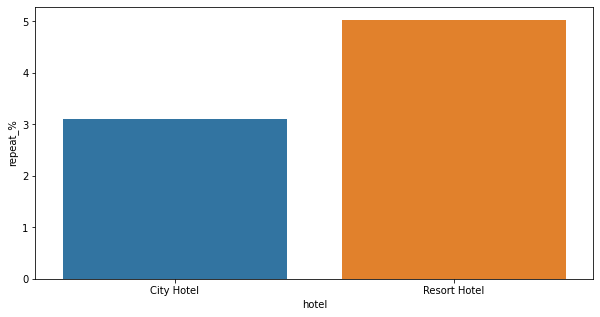

In [55]:
# Selecting and counting repeated customers bookings
repeated_data = hb_df[hb_df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Q10) Which is the most common channel for booking hotels?

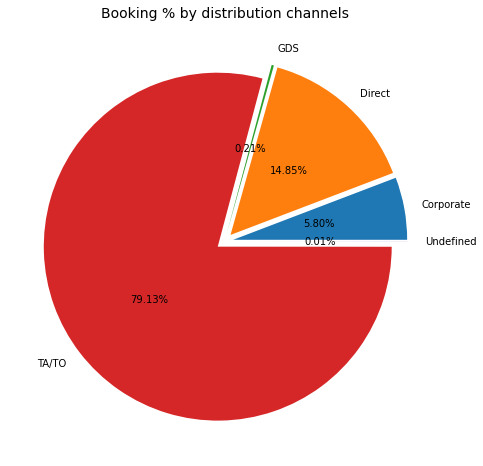

In [36]:
group_by_dc = hb_df.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/hb_df.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Q11) Which channel has longer average waiting time?

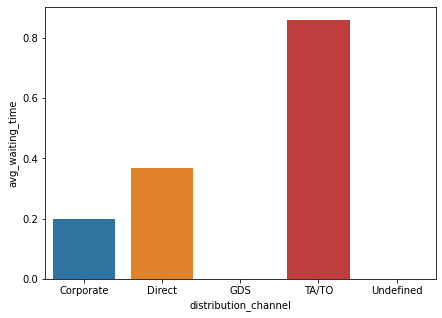

In [37]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

Q12) Which distribution channel brings better revenue generating deals for hotels?

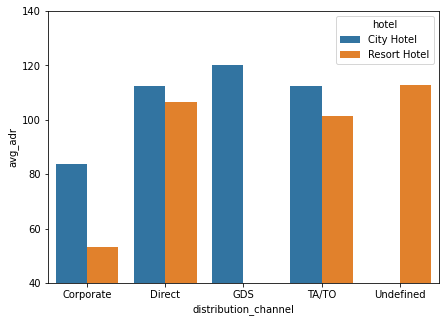

In [38]:
group_by_dc_hotel = hb_df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

Q13) Which significant distribution channel has highest cancellation percentage?

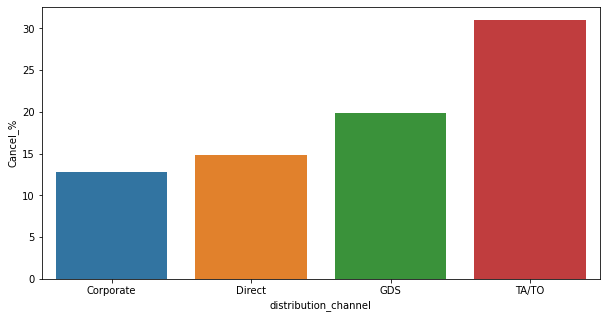

In [39]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

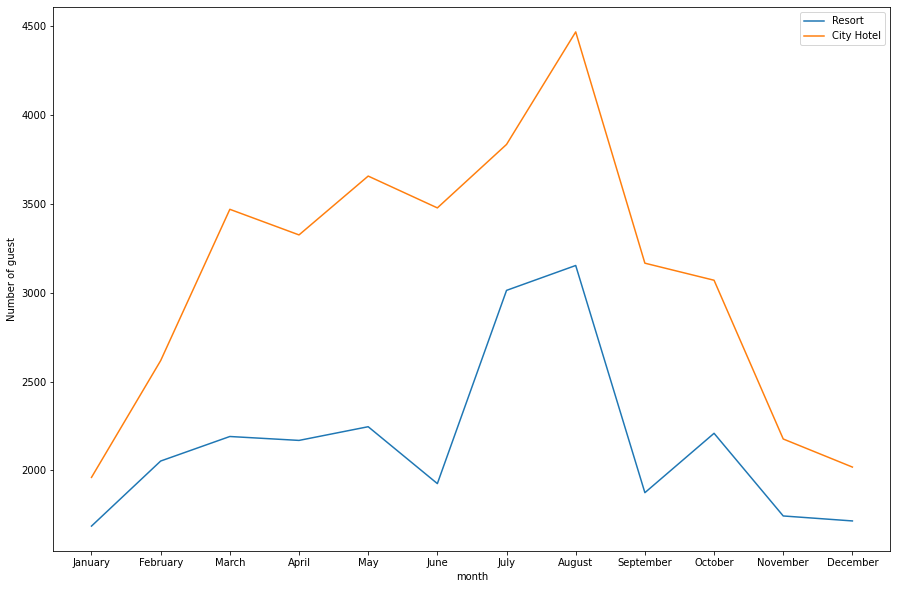

In [57]:
#Which are the most busy months?
d_month = hb_df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hb_df[(hb_df['hotel'] == 'Resort Hotel') & (hb_df['is_canceled'] == 0)]
data_city = hb_df[(hb_df['hotel'] == 'City Hotel') & (hb_df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)